### 2.1. Download the dataset from UCI Machine Learning Repository

In [77]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer

### 2.2. Read the data and add attribute headers (they are absent in the original .data file)

In [43]:
df = pd.read_csv("data_2.data", sep=", ", names=["age", "workclass", "fnlwgt", "education", 
                                  "education_num", "marital_status", "occupation", 
                                  "relationship", "race", "sex", "capital_gain", 
                                  "capital_loss", "hours_per_week", "native_country", "income"])

/home/mhirna/miniconda3/envs/AI_course/lib/python3.6/site-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [44]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 2.3. Investigate the attributes for wrong data, fix the typos in classes’ names, standartidize it’s representation
(so later it would be easier to convert them to boolean cagetorical attributes).

#### After investigating all the data (looking at unique values) and classes I didn't find any typos/mistakes

### 2.4. Fill the missing values in categorical attributes (missing values are denoted by ‘?’) and explain which method you have used and why for each column.

In [46]:
for col in df:
    if "?" in list(set(df[col])):
        print(col)

workclass
occupation
native_country


In [15]:
print("Workclass is missing in the " + str(round(len(df[df.workclass == " ?"]) / len(df) * 100, 2)) + "% of the data")
print("Occupation is missing in the " + str(round(len(df[df.occupation == " ?"]) / len(df) * 100, 2)) + "% of the data")
print("Native country is missing in the " + str(round(len(df[df.native_country == " ?"]) / len(df) * 100, 2)) + "% of the data")

Workclass is missing in the 5.64% of the data
Occupation is missing in the 5.66% of the data
Native country is missing in the 1.79% of the data


Let's explore these columns more deeply.

#### Workclass

In [47]:
print(df.workclass.value_counts())
print("\nPrivate is {}% of the data".format(22696/len(df)*100))

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

Private is 69.70301894904948% of the data


Because we have a clear most popular value, we can safely impute "?" with "Private"

In [48]:
df = df.replace({"workclass": {"?": "Private"}})

#### Occupation

In [49]:
print(df.occupation.value_counts())

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64


Here it is very unclear of the dominating value, and as missing values make only 5% of the data we can drop those.

In [52]:
df = df[df.occupation != "?"]

#### Native country

In [54]:
print(df.native_country.value_counts())
print("\nUnited States is a native country in {}% of the data".format(27504/len(df)*100))

United-States                 27504
Mexico                          610
United States                   556
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
El-Salvador                     100
India                           100
Cuba                             92
England                          86
Jamaica                          80
South                            71
Italy                            68
China                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Columbia                         56
Poland                           56
Taiwan                           42
Iran                             42
Haiti                            42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                      

United States is a native country for 90% of the data, we can safely impute "?"" with "United States"

In [55]:
df = df.replace({"native_country": {"?": "United States"}})

### 2.5. There are a lot of missing values in columns capital-gain and capital-loss. Investigate what is the best way to deal with them, and apply it.

In [56]:
print("Capital gain is missing in the " + str(round(len(df[df.capital_gain == 0]) / len(df) * 100, 2)) + "% of the data")
print("Capital loss is missing in the " + str(round(len(df[df.capital_loss == 0]) / len(df) * 100, 2)) + "% of the data")

Capital gain is missing in the 91.57% of the data
Capital loss is missing in the 95.24% of the data


In [57]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,30718.000000,3.071800e+04,30718.000000,30718.000000,30718.000000,30718.000000
mean,38.443584,1.898455e+05,10.130314,1106.037079,88.910216,40.949313
std,13.118227,1.054583e+05,2.562469,7497.863364,405.657203,11.985382
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178285e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.785170e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.373170e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In this situation we can:
 - replace zeros with mean / most frequent value for the column
 - drop columns
 - train model that will predict the value

I wouldn't prefer dropping these values, because we may lose important information, so I will replace zeros with mean for capital gain / loss

In [97]:
int(df[df.capital_gain != 0].capital_gain.mean())

2113

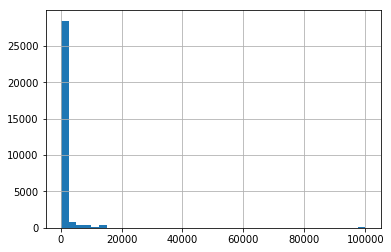

In [100]:
df[df.capital_gain != 0].capital_gain.hist(bins = 40)

In [101]:
df = df.replace({"capital_gain": {0: 2110}})

In [102]:
int(df[df.capital_loss != 0].capital_loss.mean())

1869

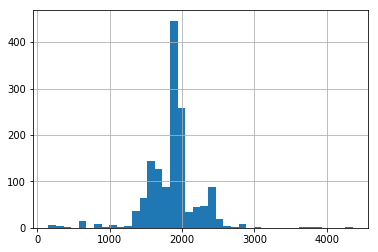

In [103]:
df[df.capital_loss != 0].capital_loss.hist(bins = 40)

In [104]:
df = df.replace({"capital_loss": {0: 1800}})

### 2.6. Check continuous attributes for outliers, and if you find any - propose the way to deal with them.

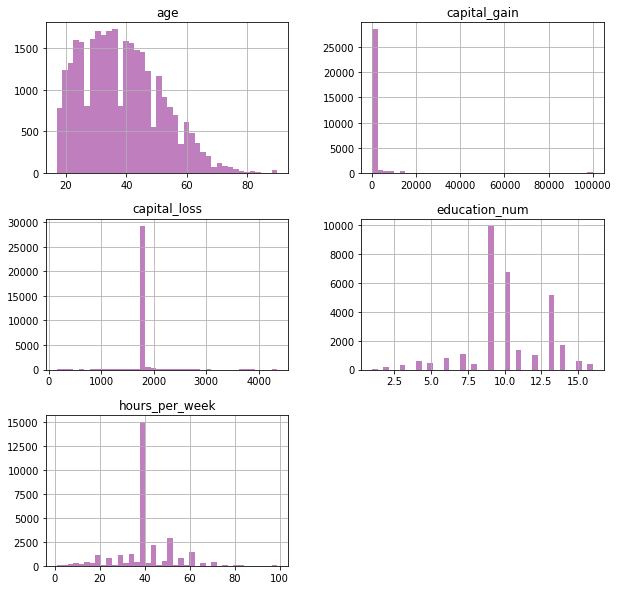

In [106]:
hists = df.hist(color='purple', alpha=0.5,figsize=(10, 10), bins=40, column=["age", "capital_gain", "capital_loss", "education_num", "hours_per_week"])

There are still some outliers left, especially in capital gain andcapital loss, but I wouldn't really remove those, as they can make a difference (for example capital gain 100000 most probably means income >50K)

### 2.7. Chose some ML model you would like to use to solve the classification problem with this dataset and explain the next steps you would take to make your data ready for modeling (3-4 sentences)

I would try Logistic Regression and Random Forest and see how they perform. For that task I will transform categorical variable using one hot encoding, maybe add some features and normalize the continious data. 